<a href="https://colab.research.google.com/github/saitharun5515/Dissertation-Early-Detection-of-Alzheimer-s-Disease-/blob/main/hi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

In [2]:
from datasets import load_dataset
dataset = load_dataset("Falah/Alzheimer_MRI")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001-c08a401c53fe53(…):   0%|          | 0.00/22.6M [00:00<?, ?B/s]

data/test-00000-of-00001-44110b9df98c558(…):   0%|          | 0.00/5.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5120 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1280 [00:00<?, ? examples/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5120
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1280
    })
})

In [4]:
label_names = {
    0: "MildDemented",
    1: "ModerateDemented",
    2: "NonDemented",
    3: "VeryMildDemented"
}

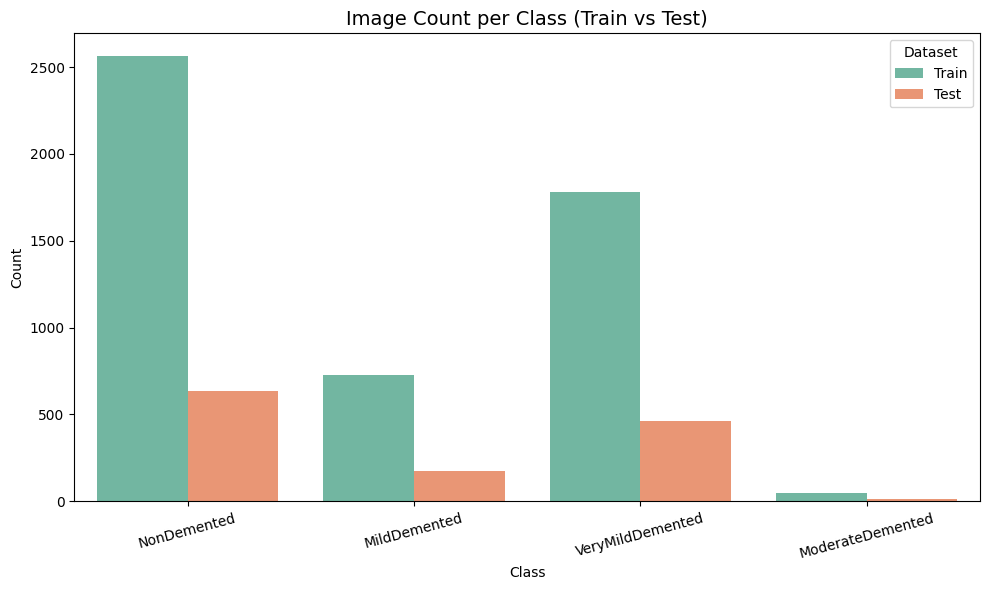

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

train_counts = Counter(dataset['train']['label'])
test_counts = Counter(dataset['test']['label'])


df_train = pd.DataFrame({'Class': [label_names[i] for i in train_counts.keys()],
                         'Count': train_counts.values(),
                         'Dataset': 'Train'})

df_test = pd.DataFrame({'Class': [label_names[i] for i in test_counts.keys()],
                        'Count': test_counts.values(),
                        'Dataset': 'Test'})

df_all = pd.concat([df_train, df_test])

plt.figure(figsize=(10,6))
sns.barplot(x='Class', y='Count', hue='Dataset', data=df_all, palette='Set2')
plt.title("Image Count per Class (Train vs Test)", fontsize=14)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

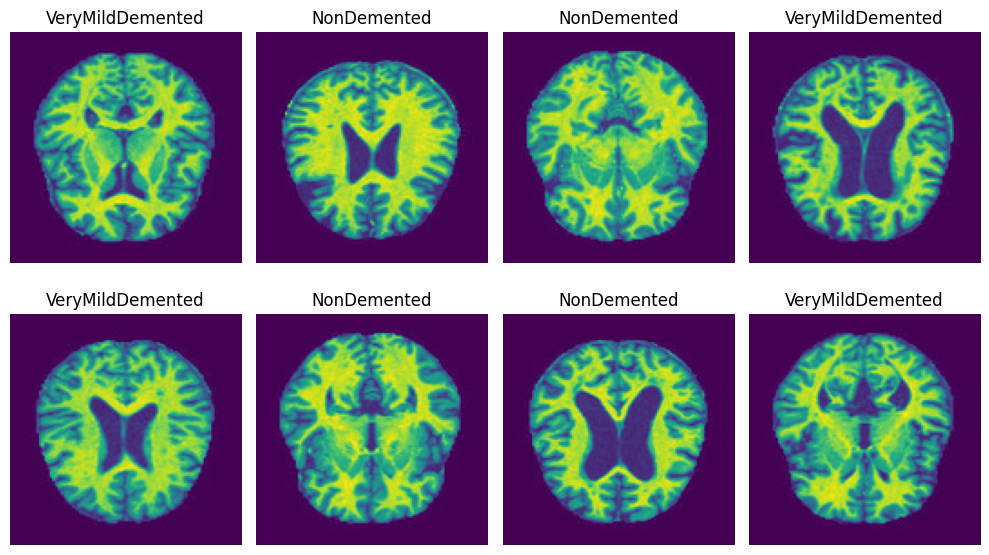

In [6]:
import random

plt.figure(figsize=(10,6))
for i in range(8):
    sample = random.choice(dataset['train'])
    img = sample['image']
    label = label_names[sample['label']]
    plt.subplot(2,4,i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()